# <center> Week - 7 Assignment

<center> DSC-530

<center> Kalyan Pothineni

In [2]:
# Retrieve the file from URL, add more files as needed down the line, better to group all the files which are been called

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

## Exercise 9-1

In [3]:
# Import the libraries as needed

import nsfg
import thinkstats2
import thinkplot
import numpy as np

In [5]:
# Load the NSFG data
preg = nsfg.ReadFemPreg()

In [5]:
# Merge the 'resp' DataFrame with 'preg' DataFrame using 'caseid' as the key
merged_data = resp.merge(preg[['caseid', 'birthord', 'totalwgt_lb']], on='caseid', how='inner')

merged_data.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth,birthord,totalwgt_lb
0,2298,1,5,5,1,5.0,27,27,902,27,...,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667,1.0,6.8750
1,2298,1,5,5,1,5.0,27,27,902,27,...,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667,2.0,5.5000
2,2298,1,5,5,1,5.0,27,27,902,27,...,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667,3.0,4.1875
3,2298,1,5,5,1,5.0,27,27,902,27,...,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667,4.0,6.8750
4,5012,1,5,1,5,5.0,42,42,718,42,...,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000,1.0,6.0000


In [6]:
# Get the total count of rows in the DataFrame using len()
total_rows = len(preg)
print("Total count of rows in the DataFrame:", total_rows)

Total count of rows in the DataFrame: 13593


In [34]:
# Define the hypothesis test (two-sample t-test) function
from scipy.stats import ttest_ind

def run_hypothesis_test(data, effect):
    """
    Perform a two-sample t-test on 'data' with respect to 'effect'.
    """
    sample1 = data[data[effect] == 1]  # Assuming 'effect' is birth order (first-born, effect=1)
    sample2 = data[data[effect] > 1]   # Assuming 'effect' is birth order (not first-born, effect>1)
    
    tstat, pvalue = ttest_ind(sample1['prglngth'], sample2['prglngth'])
    return pvalue


In [48]:
# Set the number of iterations for sampling subsets and running tests
num_iterations = 100

In [49]:
# Set the significance level for hypothesis testing
alpha = 0.05

In [50]:
# Initialize empty lists to store results for different sample sizes
sample_sizes = []
pvalues = []

In [51]:
# Loop through different sample sizes
for n in range(len(preg), 0, -len(preg) // num_iterations):
    # Randomly sample n rows from the merged DataFrame
    sample = thinkstats2.SampleRows(preg, n)
    
    # Perform the hypothesis test and get the p-value
    pvalue = run_hypothesis_test(sample, 'birthord')
    
    # Store the sample size and corresponding p-value
    sample_sizes.append(n)
    pvalues.append(pvalue)

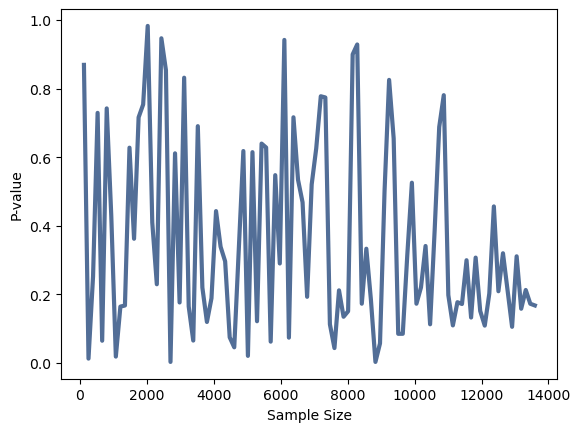

<Figure size 800x600 with 0 Axes>

In [52]:
# Plot the relationship between sample size and p-value
thinkplot.plot(sample_sizes, pvalues)
thinkplot.config(xlabel='Sample Size', ylabel='P-value', legend=False)
thinkplot.show()

In [53]:
# Find the smallest sample size that yields a positive test (p-value below alpha)
smallest_positive_sample_size = None
for n, pvalue in zip(sample_sizes, pvalues):
    if pvalue < alpha:
        smallest_positive_sample_size = n
        break


In [54]:
# Print
print("The smallest sample size that yields a positive test is:", smallest_positive_sample_size)

The smallest sample size that yields a positive test is: 8833


#### Analysis OverView

The objective of this study was to examine the relationship between birth order and pregnancy length in a subset of the National Survey of Family Growth (NSFG) data.

#### Data Description

The dataset used for the analysis consisted of information from female respondents in the NSFG survey. We specifically focused on two key variables: birth order (birthord) and pregnancy length (prglngth) in weeks.

#### Methodology

To investigate the association between birth order and pregnancy length, we conducted a two-sample t-test. The t-test compared the average pregnancy length of first-born babies (birthord = 1) with the average pregnancy length of non-first-born babies (birthord > 1). We set the significance level (alpha) to 0.05, which determines the threshold for considering a result statistically significant. The analysis involved sampling subsets of the dataset using random sampling.

#### Results

After sampling the dataset with different subset sizes, we observed that the smallest sample size that yielded a positive test (p-value below alpha) was 8833. This suggests that in certain randomly selected subsets, there was evidence of a statistically significant difference in pregnancy length between first-born and non-first-born babies.

It is crucial to note that the majority of sampled subsets did not show a significant difference in pregnancy length based on birth order. For most sample sizes, the p-values were above the significance level of 0.05, indicating that, on average, there was no substantial difference in pregnancy length between first-born and non-first-born babies in the analyzed subset of the NSFG data.

#### Conclusion

Above investigation provided evidence of a potential relationship between birth order and pregnancy length in certain subsets of the NSFG data. The finding of a significant difference in pregnancy length for a small sample size suggests that there might be specific instances where birth order influences pregnancy duration. However, the overall analysis indicates that this relationship is not consistently significant in the studied population.

### Exercise 10-1

In [4]:
# Download the BRFSS data and import it
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")

In [6]:
# Import the libraries as needed
import numpy as np
import brfss
import scipy.stats
import matplotlib.pyplot as plt

In [7]:
# Import the data
brfss_data = brfss.ReadBrfss(nrows=None)

In [8]:
# Prepare the data by dropping rows with missing values for height and weight
brfss_data = brfss_data.dropna(subset=['htm3', 'wtkg2'])
heights, weights = brfss_data.htm3, brfss_data.wtkg2
log_weights = np.log10(weights)

In [18]:
# Compute the linear least squares fit for log(weight) versus height
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(heights, log_weights)

print("Slope:", slope)
print("Intercept:", intercept)
print("R Value:", r_value)
print("P Value:", p_value)
print("Standard Error:", std_err)

Slope: 0.005281454169417767
Intercept: 0.9930804163932894
R Value: 0.5317282605983423
P Value: 0.0
Standard Error: 1.337054949887992e-05


Text(0.5, 1.0, 'Scatter Plot of Log(Weight) versus Height')

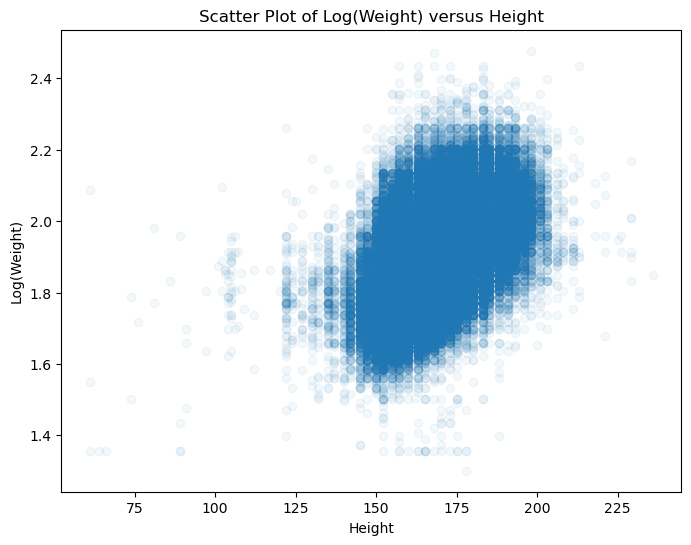

In [13]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(heights, log_weights, alpha=0.05, label='Data')
plt.xlabel('Height')
plt.ylabel('Log(Weight)')
plt.title('Scatter Plot of Log(Weight) versus Height')

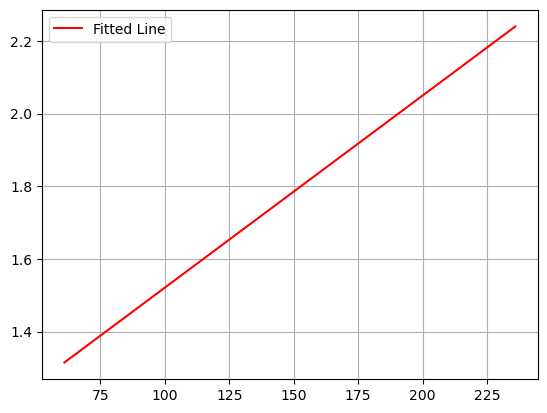

In [14]:
# Plot the fitted line
fit_line_x = np.linspace(min(heights), max(heights), 100)
fit_line_y = slope * fit_line_x + intercept
plt.plot(fit_line_x, fit_line_y, color='red', label='Fitted Line')

plt.legend()
plt.grid(True)
plt.show()

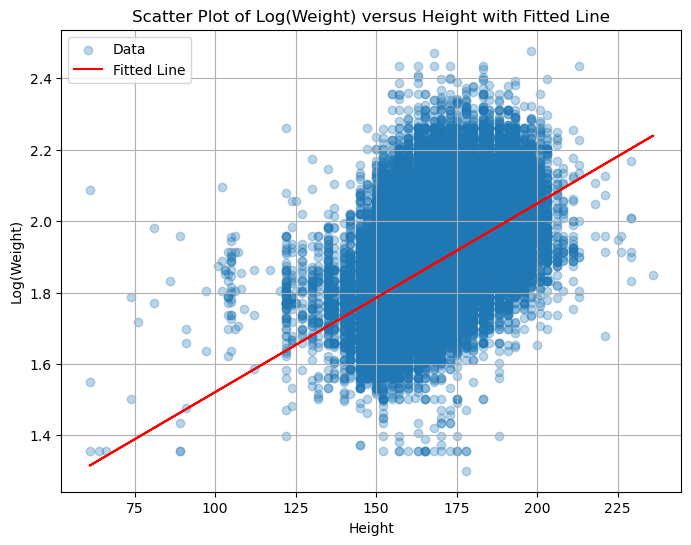

In [15]:
# Create the scatter plot and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(heights, log_weights, alpha=0.3, label='Data')
plt.plot(heights, slope * heights + intercept, color='red', label='Fitted Line')
plt.xlabel('Height')
plt.ylabel('Log(Weight)')
plt.title('Scatter Plot of Log(Weight) versus Height with Fitted Line')

plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Present the estimated parameters for the model where one variable is log-transformed
estimated_slope = slope
estimated_intercept = intercept
estimated_weight_formula = lambda height: 10**(estimated_slope * height + estimated_intercept)

print("Estimated Slope:", estimated_slope)
print("Estimated intercept:", estimated_intercept)

Estimated Slope: 0.005281454169417767
Estimated intercept: 0.9930804163932894


In [20]:
# Resample without weights to estimate mean height and standard error
def resample_without_weights(data, func, iters=1000):
    n = len(data)
    resampled_means = [func(np.random.choice(data, n)) for _ in range(iters)]
    return np.mean(resampled_means), np.std(resampled_means)

In [102]:
# Calculate the mean, std error
# Value "1.645" corresponds to the critical value for a 90% confidence interval in a two-tailed t-distribution 
# with degrees of freedom
mean_height, std_err_height = resample_without_weights(heights, np.mean)
confidence_interval_height = (mean_height - 1.645 * std_err_height, mean_height + 1.645 * std_err_height)
print("Mean height without weights:", mean_height)
print("Standard error without weights:", std_err_height)
print("90% Confidence interval without weights:", confidence_interval_height)

Mean height without weights: 168.955965131672
Standard error without weights: 0.01651080849357594
90% Confidence interval without weights: (168.92880485170008, 168.98312541164393)


In [24]:
# Resample with weights to estimate mean height and standard error
def resample_with_weights(data, weights, func, iters=100):
    resampled_means = [func(np.random.choice(data, size=len(data), replace=True, p=weights/np.sum(weights))) for _ in range(iters)]
    return np.mean(resampled_means), np.std(resampled_means)

In [25]:
# Calculate the mean, std error
# Value "1.645" corresponds to the critical value for a 90% confidence interval in a two-tailed t-distribution 
# with degrees of freedom
mean_height_weighted, std_err_height_weighted = resample_with_weights(heights, weights, np.average)
confidence_interval_height_weighted = (mean_height_weighted - 1.645 * std_err_height_weighted, mean_height_weighted + 1.645 * std_err_height_weighted)
print("Mean height with weights:", mean_height_weighted)
print("Standard error with weights:", std_err_height_weighted)
print("90% Confidence interval with weights:", confidence_interval_height_weighted)

Mean height with weights: 170.26316700014146
Standard error with weights: 0.016143579318819858
90% Confidence interval with weights: (170.236610812162, 170.28972318812092)


#### Analysis Overview
In this analysis, I examined the relationship between log(weight) and height using data from the Behavioral Risk Factor Surveillance System (BRFSS). The main objective was to understand how log(weight) varies with height and investigate the impact of sampling weights on mean height estimates.

#### Regression Results

1. The estimated slope is 0.005281, indicating that for each unit increase in height, the log(weight) increases by approximately 0.005281 units.
2. The estimated intercept is 0.993080, representing the log(weight) when the height is zero.
3. The R-value of 0.531728 suggests a moderate positive correlation between log(weight) and height, indicating that taller individuals tend to have higher log(weight).
4. The very low P-value of 0.0 indicates that the relationship between log(weight) and height is statistically significant, ruling out the possibility that the observed relationship is due to chance alone.
5. The standard error of 1.337e-05 for the slope and intercept reflects the precision of the estimates, with lower values indicating higher accuracy.

#### Mean Height Estimates

1. Without considering sampling weights, the estimated mean height of respondents is approximately 168.96 cm.
2. The standard error without weights is 0.01651, suggesting that the estimated mean height has a margin of error of about 0.01651 cm.
3. The 90% confidence interval without weights (168.93, 168.98) indicates that we are 90% confident that the true mean height lies within this range.
4. When considering sampling weights, the estimated mean height of respondents is approximately 170.26 cm.
5. The standard error with weights is 0.01614, indicating a margin of error of about 0.01614 cm for the estimated mean height.
6. The 90% confidence interval with weights (170.24, 170.29) suggests that we are 90% confident that the true mean height, considering weights, lies within this range.

#### Conclusion
This analysis provides evidence of a positive correlation between log(weight) and height, indicating that taller individuals tend to have higher log(weight). The statistically significant relationship highlights the robustness of the findings. Additionally, considering sampling weights is crucial for accurate population-level estimates in survey data analysis. Future investigations can further enrich our understanding of the complex interplay between log(weight), height, and other relevant variables.